# MNIST Data (Reduced)
- This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
- https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools 
import numpy as np

## Data

In [2]:
mnist = tf.keras.datasets.mnist

(X_train_, y_train), (X_test_, y_test) = mnist.load_data()
X_train_, X_test_ = X_train_.astype(np.float32) / 255.0, X_test_.astype(np.float32)/ 255.0

In [3]:
print(X_train_.shape)
print(X_test_.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
# Reduce dimension size
np.random.seed(0) 

REDUCE_DIM = 2000
idx = np.random.permutation(REDUCE_DIM)

X_train = X_train_[idx]
y_train = y_train[idx]
X_test = X_test_[idx]
y_test = y_test[idx]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 28, 28)
(2000, 28, 28)
(2000,)
(2000,)


## Model building
- Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [5]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28,28)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu', name='hidden1'),
  tf.keras.layers.Dense(10, activation='softmax', name='output')
])

## Compile model
- Prepare for fitting

In [6]:
model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 128)               100480    
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Training (Fitting)
- The `Model.fit` method adjusts the model parameters to minimize the loss: 

In [8]:
tf_fit = model.fit(X_train, y_train, validation_split=0.1, epochs=20)

Epoch 1/20
57/57 [==============================] - 0s 3ms/step - loss: 1.1221 - accuracy: 0.7094 - val_loss: 0.6075 - val_accuracy: 0.8400
Epoch 2/20
57/57 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.8778 - val_loss: 0.4371 - val_accuracy: 0.8950
Epoch 3/20
57/57 [==============================] - 0s 1ms/step - loss: 0.3136 - accuracy: 0.9194 - val_loss: 0.3663 - val_accuracy: 0.9050
Epoch 4/20
57/57 [==============================] - 0s 1ms/step - loss: 0.2436 - accuracy: 0.9394 - val_loss: 0.3485 - val_accuracy: 0.9050
Epoch 5/20
57/57 [==============================] - 0s 983us/step - loss: 0.1958 - accuracy: 0.9544 - val_loss: 0.3490 - val_accuracy: 0.9100
Epoch 6/20
57/57 [==============================] - 0s 807us/step - loss: 0.1640 - accuracy: 0.9628 - val_loss: 0.3425 - val_accuracy: 0.9050
Epoch 7/20
57/57 [==============================] - 0s 860us/step - loss: 0.1248 - accuracy: 0.9750 - val_loss: 0.3382 - val_accuracy: 0.9200
Epoch 8/20
57/

In [9]:
for key, val in tf_fit.history.items():
    print( f'{key:20s}: {[ f"{i:3.2f}" for i in val]}')


loss                : ['1.12', '0.44', '0.31', '0.24', '0.20', '0.16', '0.12', '0.10', '0.09', '0.07', '0.06', '0.05', '0.04', '0.04', '0.03', '0.03', '0.02', '0.02', '0.02', '0.01']
accuracy            : ['0.71', '0.88', '0.92', '0.94', '0.95', '0.96', '0.98', '0.98', '0.99', '0.99', '0.99', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00']
val_loss            : ['0.61', '0.44', '0.37', '0.35', '0.35', '0.34', '0.34', '0.33', '0.33', '0.32', '0.32', '0.33', '0.32', '0.32', '0.32', '0.32', '0.33', '0.33', '0.33', '0.33']
val_accuracy        : ['0.84', '0.89', '0.90', '0.90', '0.91', '0.90', '0.92', '0.92', '0.93', '0.92', '0.92', '0.93', '0.92', '0.92', '0.93', '0.92', '0.92', '0.92', '0.92', '0.93']


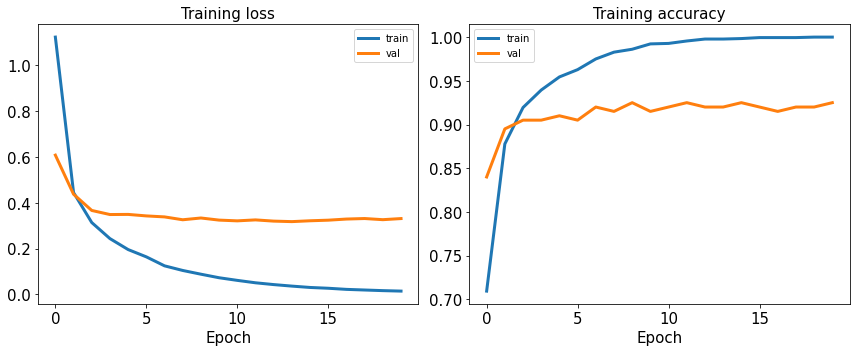

In [10]:
hist = tf_fit.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.plot(hist['val_loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(['train','val'])

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.plot(hist['val_accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
ax.legend(['train','val'])

#plt.savefig('mnist1.pdf')

plt.show()

## Evaluation
- The `Model.evaluate` method checks the models performance.

In [11]:
model.evaluate(X_test,  y_test)

63/63 [==============================] - 0s 365us/step - loss: 0.4578 - accuracy: 0.8710


[0.45777085423469543, 0.8709999918937683]

In [12]:
y_hat = model(X_test)
print(y_hat.shape)
print(y_hat.numpy()[:2])

(2000, 10)
[[1.6364096e-07 3.8740684e-08 5.5567747e-05 2.5931846e-03 9.8616552e-01
  2.0649759e-08 3.8300425e-09 5.9444035e-05 2.1615639e-08 1.1126015e-02]
 [8.5461215e-06 1.1063927e-08 6.4648042e-09 1.1502938e-05 1.9725952e-08
  9.9991655e-01 7.7807893e-10 5.0394860e-08 5.3634387e-05 9.6543044e-06]]


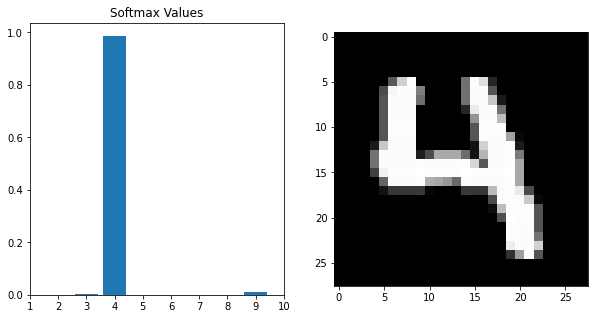

In [13]:
x_ticklabel = [i + 1 for i in range(10)]
fig, axes = plt.subplots(1,2, figsize=(10,5))
yp = y_hat.numpy()[0]
xp = list(range(yp.shape[0]))
axes[0].bar(xp, yp)
axes[0].set_title('Softmax Values')
axes[0].set_xticks(x_ticklabel)
axes[0].set_xticklabels(x_ticklabel)
axes[0].set_xlim([1,10])
axes[1].imshow(X_test[0], cmap='gray')
plt.show()

In [14]:
# Find misclassification
y_pred_tf = model(X_test)
y_pred_tf.numpy().shape

y_pred = tf.math.argmax(y_pred_tf,axis=1).numpy()
print(y_pred.shape)
print(y_test.shape)

loc = y_pred != y_test
print(f'Missclassification = {loc.sum()}')

(2000,)
(2000,)
Missclassification = 258


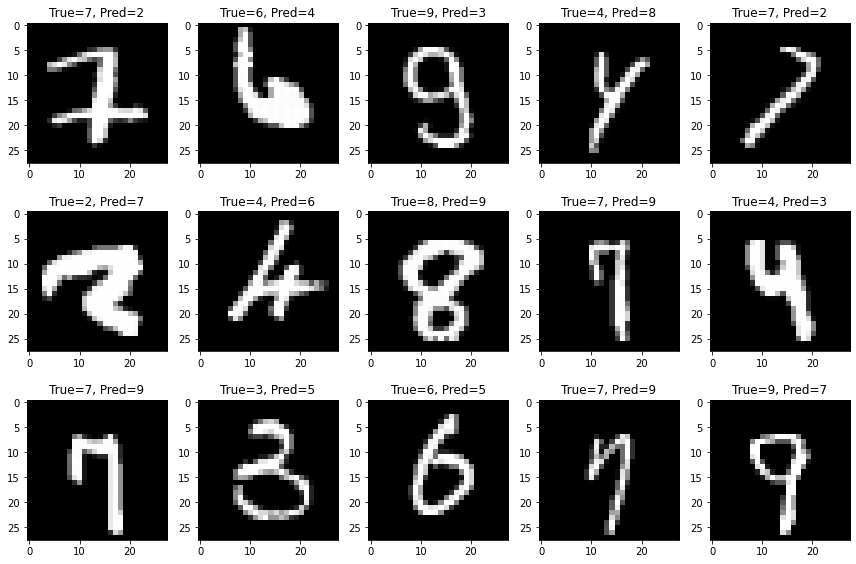

In [15]:
fig, axes2D = plt.subplots(3,5, figsize=(12,8))
axes = list(itertools.chain.from_iterable(axes2D)) # Flatten 2D list
X_test_miss = X_test[loc]
y_test_miss = y_test[loc]
y_pred_miss = y_pred[loc]
for idx, ax in enumerate(axes):
    ax.imshow(X_test_miss[idx], cmap='gray')
    ax.set_title(f'True={y_test_miss[idx]}, Pred={y_pred_miss[idx]}')
fig.tight_layout()
plt.show()